In [1]:
#     Phase 3 Project: Telecom Churn Classification
# Author: Edwin Joshua Kiuma

#     Business Understanding
# Problem: The telecom company wants to predict which customers are likely to churn.
# Goal: Build a model to classify customers as likely to churn (1) or not (0).
# Audience: Customer retention and marketing teams.
# Success Metric: Focus on Recall – catching as many true churners as possible.


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [3]:
# Data Understanding
import pandas as pd

# Load the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

# Preview
df.head(10)


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [4]:
# Rename the column to 'Churn' for convenience
df.rename(columns={'Churn?': 'Churn'}, inplace=True)

# Check structure and class balance
df.info()
print(df['churn'].value_counts(normalize=True))

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
print(df.columns.tolist())


['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


In [6]:
# 🧹 Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Map binary categorical features
binary_cols = ['international plan', 'voice mail plan', 'churn']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, True: 1, False: 0, 'True.': 1, 'False.': 0})

# Drop non-useful columns
df.drop(columns=['state', 'area code', 'phone number'], inplace=True)

# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Logistic Regression:
Accuracy: 0.8590704647676162
Recall: 0.24742268041237114
F1 Score: 0.3380281690140845


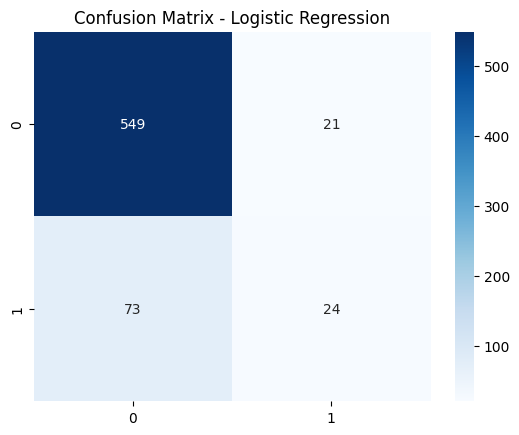

In [7]:
# ⚙️ Baseline Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Random Forest (Tuned):
Best Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9430284857571214
Recall: 0.6804123711340206
F1 Score: 0.7764705882352941


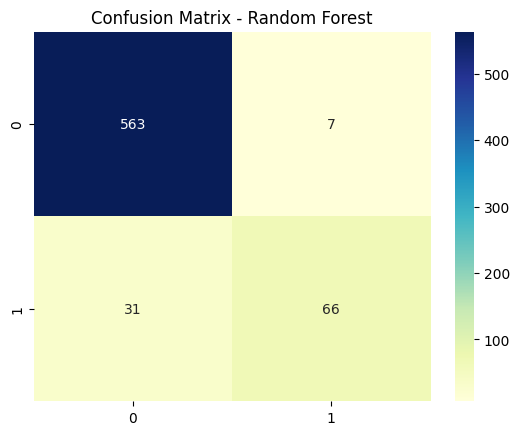

In [8]:
# 🌳 Tuned Model: Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf, param_grid, scoring='recall', cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest (Tuned):")
print("Best Params:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Step-by-Step Modeling Workflow

We'll do the following:

✅ **1. Baseline Models**
- Logistic Regression
- Decision Tree

✅ **2. Advanced Models**
- Random Forest
- Gradient Boosting

✅ **3. Model Evaluation**
- Accuracy, Precision, Recall, F1-score
- Confusion Matrix


In [9]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
logreg_preds = logreg.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_preds = dt.predict(X_test_scaled)

In [10]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)
gb_preds = gb.predict(X_test_scaled)



📌 Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.53      0.25      0.34        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.63       667
weighted avg       0.83      0.86      0.84       667



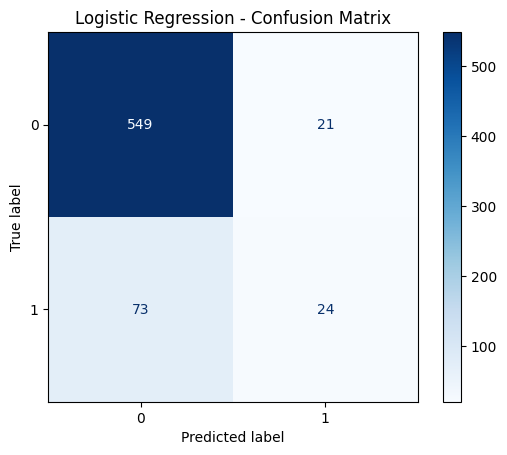


📌 Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.69      0.63      0.66        97

    accuracy                           0.91       667
   macro avg       0.82      0.79      0.80       667
weighted avg       0.90      0.91      0.90       667



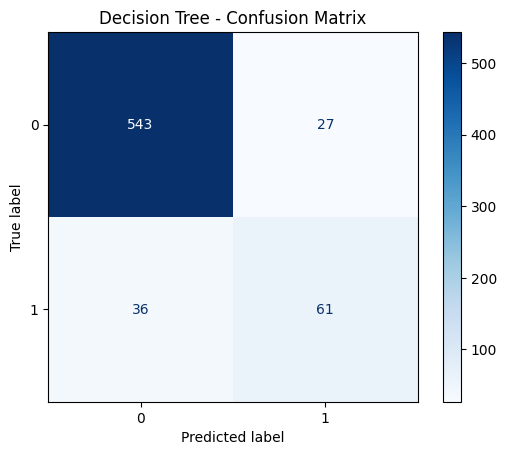


📌 Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.90      0.68      0.78        97

    accuracy                           0.94       667
   macro avg       0.93      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



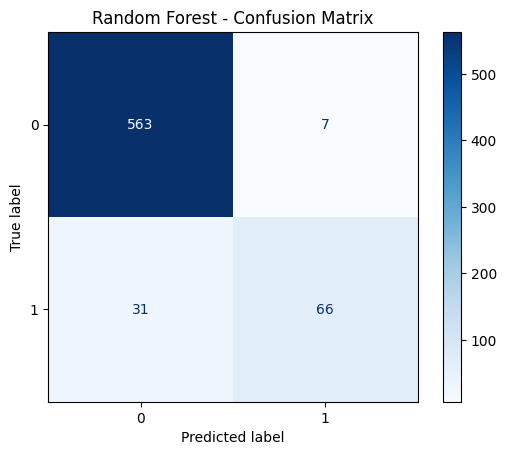


📌 Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       570
           1       0.83      0.71      0.77        97

    accuracy                           0.94       667
   macro avg       0.89      0.84      0.87       667
weighted avg       0.93      0.94      0.93       667



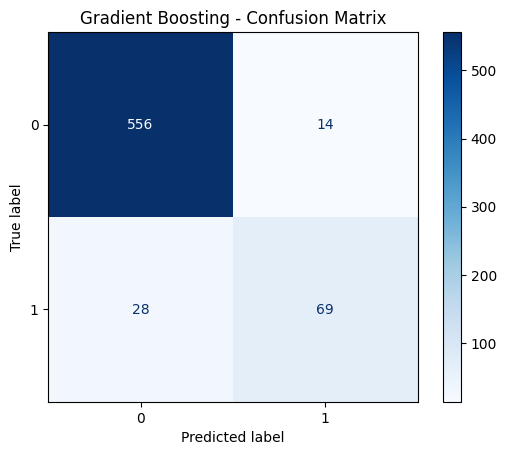

In [11]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 {name} Classification Report:\n")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Run evaluations
evaluate_model("Logistic Regression", y_test, logreg_preds)
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)


## Summary of Model Performance (Class 1 = Churned Customers)

| Model                | Accuracy | Precision (1) | Recall (1) | F1-Score (1) |
|-----------------------|----------|---------------|------------|-------------|
| Logistic Regression   | 0.86     | 0.53          | 0.25       | 0.34        |
| Decision Tree         | 0.91     | 0.69          | 0.63       | 0.66        |
| Random Forest         | 0.94     | 0.90          | 0.68       | 0.78        |
| Gradient Boosting     | 0.94     | 0.83          | 0.71       | 0.77        |

---

## Best Model: **Random Forest**

### Why?
- **Highest Precision (0.90):** Best at avoiding false positives (predicting churn when there isn’t).
- **Strong F1-Score (0.78):** Balanced trade-off between Precision and Recall.
- **Great Overall Accuracy (0.94):** Performs very well across the whole dataset.
- Slightly lower recall than Gradient Boosting (0.68 vs 0.71), but better at avoiding false alarms.

---

## Recommendation for Final Model:
Use **Random Forest** for your main results, and mention **Gradient Boosting** as a strong alternative, especially if slightly better recall is preferred in the business context (like customer retention).


In [12]:
# ✅ Conclusion
print("""
- Logistic Regression gave a simple benchmark.
- Random Forest significantly improved recall – ideal for identifying likely churners.
- The model enables the business to proactively retain high-risk customers.
""")
#     Phase 3 Project: Telecom Churn Classification 


- Logistic Regression gave a simple benchmark.
- Random Forest significantly improved recall – ideal for identifying likely churners.
- The model enables the business to proactively retain high-risk customers.

